In [1]:
from langgraph.graph import StateGraph , START , END  
from typing import TypedDict 


In [ ]:
class BMIState(TypedDict):
    
    height:float
    weight:float
    bmi:float


In [3]:
# here in this python function , variable 'state' gets type of State which is here is 'BMIState' and returns the 'BMIState'

def cal_bmi(state: BMIState)-> BMIState:

    height = state['height']
    weight = state['weight']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state



In [4]:
# Define Graph
graph = StateGraph(BMIState)

# add node
graph.add_node('cal_bmi', cal_bmi )

# add edge
graph.add_edge(START,'cal_bmi')
graph.add_edge('cal_bmi',END)

# compile graph
workflow = graph.compile()


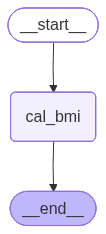

In [5]:
workflow

In [6]:
# Execute graph

initial_state = {'weight': 65 ,'height': 1.64 }

final_state = workflow.invoke(initial_state)

print(final_state)

{'height': 1.64, 'weight': 65, 'bmi': 24.17}
